In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
from PIL import Image
from io import BytesIO
from torchvision import transforms
import torch
from tqdm import tqdm  # Optional but helpful for progress bars
import time            # If you're rate-limiting requests
import torchvision.transforms.functional as TF 
from PIL import Image, ImageOps


In [100]:
pt_19th = pd.read_csv('../DATA/pt_19th.csv')
dr_19th = pd.read_csv('../DATA/dr_19th.csv')

In [101]:
'''
Function Purpose: Given a URL and desired future image size will:
1. Fetch the corresponding image at URL
2. Upon fetching the image will standardize it preserving aspect ratio then return the image

Code associated with maintaining aspect ratio developed with Chat GPT. We used 244 x 244 as an initial size due to online literature that suggests pre-trained model work best for images with these resolutions
'''
def fetch_and_standardize_image(url, size=(244, 244)):

    #1. First attempt to ping the url and get the associated image
    try:
        response = requests.get(url, timeout=5)
        response.raise_for_status()

        #2. Once you have the response use it to grab the image and for consistency make sure it is RGB every time, for testing I have added a print statement here to see original image
        img = Image.open(BytesIO(response.content)).convert("RGB")
        plt.imshow(img)
        plt.axis('off')  # Turn off axis labels
        plt.title("Image before Resizing")
        plt.show()


        #3. Get the original dimensions of the artwork to guide resizing step
        orig_width, orig_height = img.size

        #4. This part of the code looks at the original dimensions and the desired dimensions to work to resize the image while maintaining aspect ratio
        if orig_width > orig_height:
            new_width = size[0]
            new_height = int(size[1] * orig_height / orig_width)
        else:
            new_height = size[1]
            new_width = int(size[0] * orig_width / orig_height)

        #5. Resize the image now to the newly calculated dimensions 
        img_resized = img.resize((new_width, new_height), Image.BICUBIC)

        #6. Pad the image to match the desired size (adds padding where necissary to ensure the image fits within the target size specified in function parameters)
        img_padded = ImageOps.pad(img_resized, size, color=(255, 255, 255))

        #7. Showcases the image that has been resized, this is before the next step which will then convert the image into a numeric format for use in nueral net
        plt.imshow(img_padded)
        plt.axis('off')  # Turn off axis labels
        plt.title("Image After Resizing")
        plt.show()

        #7. Prepares the image data to be used in a nueral network, changing an image into numbers so the returned image can be used in the machine learning model
        transform = transforms.Compose([
            transforms.ToTensor(), 
        ])

        return transform(img_padded)

    #Additional error handling as needed 
    except Exception as e:
        print(f"Error fetching or processing image: {e}")
        return None

https://images.metmuseum.org/CRDImages/ep/original/DP169641.jpg


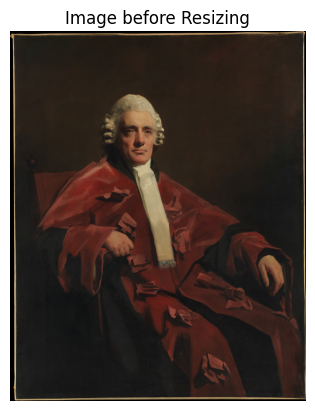

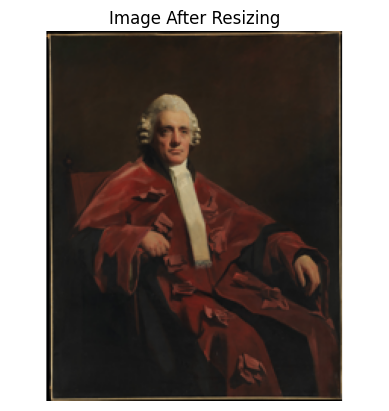

Function returns the tensor image :  tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])


In [102]:
#Test invocation of the fetch and standardize image function 
print(pt_19th.iloc[1].URL)
test_url = pt_19th.iloc[1].URL
test_image = fetch_and_standardize_image(test_url)
print("Function returns the tensor image : ", test_image)